267631

In [19]:
#Insertion sort
def insertion_sort(A):
    steps = 0
    for i in range(1,len(A)):
        key=A[i]
        j=i-1
        steps += 2
        while j>=0 and key<A[j]:
            A[j+1] = A[j]
            j=j-1
            steps +=2
        A[j+1] = key
        steps+=1
    return steps
    

In [20]:
#NOTE: B is a mutable list, therefore it gets updated when passing through
# the function. It is "directly" sent and not a copy of it and sorting 
# is done in-place
B=[7,3,1,8,2]
insertion_sort(B)
print(B)

[1, 2, 3, 7, 8]


40000 / 40000


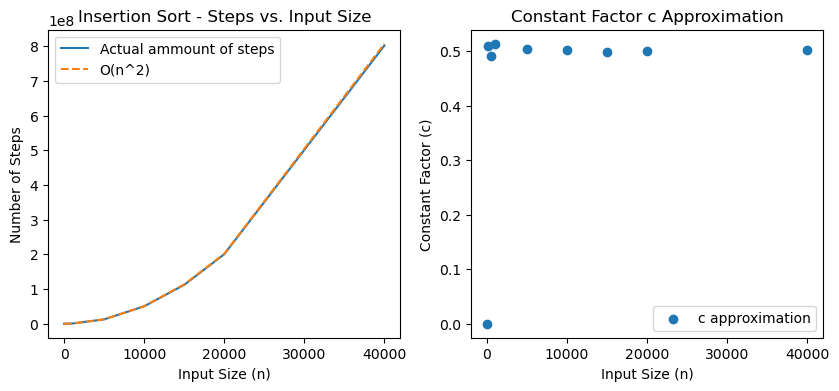

In [21]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import random

from IPython.display import clear_output

#Input values
#input_sizes = range(1, 3001)
input_sizes = [1,100,500,1000,5000,10000,15000,20000,40000]
steps_taken = []
c=[]

#random amount of inputs
for n in input_sizes:
    random_list = [random.randint(0, 1000) for _ in range(n)]
    steps = insertion_sort(random_list)
    steps_taken.append(steps)
    count=0
    count+=1
    c.append(steps/n**2)
    clear_output(wait=True)
    print(n,"/", input_sizes[-1])

#c_values = [steps / (n ** 2) if n > 0 else 0 for steps, n in zip(steps_taken, input_sizes)]
    
fig, ax = plt.subplots(1, 2,figsize=(10, 4))
    
ax[0].plot(input_sizes, steps_taken, label='Actual ammount of steps')
ax[0].plot(input_sizes, [c[4]*n**2 for n in input_sizes], label='O(n^2)', linestyle='--')
ax[0].set_xlabel('Input Size (n)')
ax[0].set_ylabel('Number of Steps')
ax[0].set_title('Insertion Sort - Steps vs. Input Size')
ax[0].legend()

ax[1].scatter(input_sizes, c, label='c approximation')
ax[1].set_xlabel('Input Size (n)')
ax[1].set_ylabel('Constant Factor (c)')
ax[1].set_title('Constant Factor c Approximation')
ax[1].legend()

plt.show()

In [5]:
#Merge sort
def merge_sort(A, steps=0):
    if len(A) > 1:  # recursion error without
        mid = len(A) // 2
        L = A[:mid]
        R = A[mid:]

        steps, L = merge_sort(L, steps)
        steps, R = merge_sort(R, steps)

        i = j = k = 0
        steps += 6 

        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                A[k] = L[i]
                i += 1
                steps += 2
            else:
                A[k] = R[j]
                j += 1
                steps += 2
            k += 1
            steps += 1

        while i < len(L):
            A[k] = L[i]
            i += 1
            k += 1
            steps += 3

        while j < len(R):
            A[k] = R[j]
            j += 1
            k += 1
            steps += 3

    return steps, A




In [6]:
#NOTE: Different from insertion sort, merge sort splits the list into
# sub-lists (L) and (R) in this case. Modification happens recursively,
# writing back the result into the original (A) list
A = [3, 1, 9, 5, 4, 7]
total_steps, sorted_A = merge_sort(A)
print("Total steps:", total_steps)

merge_sort(A)
print("Sorted:", sorted_A)

Total steps: 78
Sorted: [1, 3, 4, 5, 7, 9]


40000 / 40000
[12, 2610, 16458, 35922, 215418, 460842, 715842, 981690, 2083386]


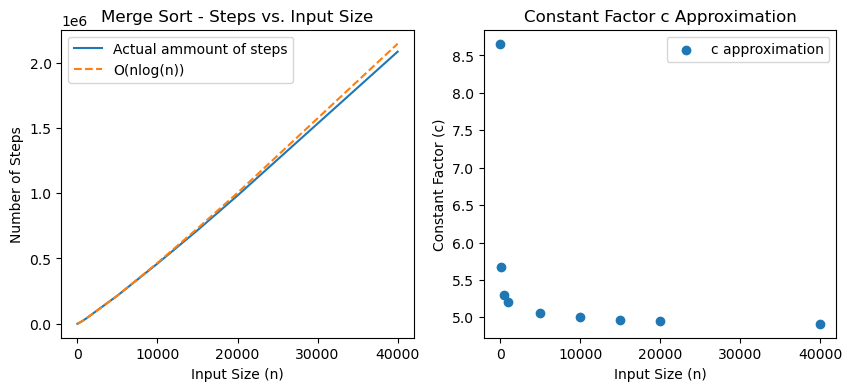

In [16]:
import math

input_sizes = [2,100,500,1000,5000,10000,15000,20000,40000]
steps_taken = []
c=[]

#execute with increasing input_size
for n in input_sizes:
    random_list = [random.randint(0, 1000) for _ in range(n)]
    steps, A = merge_sort(random_list)
    steps_taken.append(steps)
    count=0
    count+=1
    c.append(steps/(n*math.log(n)))
    clear_output(wait=True)
    print(n,"/", input_sizes[-1])
    print(steps_taken)

   
fig, ax = plt.subplots(1, 2,figsize=(10, 4))
    
ax[0].plot(input_sizes, steps_taken, label='Actual ammount of steps')
ax[0].plot(input_sizes, [c[4]*n*math.log(n) for n in input_sizes], label='O(nlog(n))', linestyle='--')
ax[0].set_xlabel('Input Size (n)')
ax[0].set_ylabel('Number of Steps')
ax[0].set_title('Merge Sort - Steps vs. Input Size')
ax[0].legend()

ax[1].scatter(input_sizes, c, label='c approximation')
ax[1].set_xlabel('Input Size (n)')
ax[1].set_ylabel('Constant Factor (c)')
ax[1].set_title('Constant Factor c Approximation')
ax[1].legend()

plt.show()

In [7]:
6*math.log(6)

10.75055681536833

In [34]:
# heap sort
def heapify(arr, n, i, steps):
    largest = i  # Initialize root
    left = 2 * i + 1     # left child
    right = 2 * i + 2    # right child

    steps += 3  
    if left < n and arr[largest] < arr[left]:
        largest = left
        steps += 1 

    if right < n and arr[largest] < arr[right]:
        largest = right
        steps += 1 

    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]  # swap 
        steps = heapify(arr, n, largest, steps)
        steps += 2

    return steps

def heap_sort(arr):
    n = len(arr)
    steps = 0

    # maxheap
    for i in range(n // 2 - 1, -1, -1):
        steps = heapify(arr, n, i, steps)
        steps += 1

    # extract elements one by one
    for i in range(n-1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]   # swap
        steps = heapify(arr, i, 0, steps)
        steps += 2

    return steps


In [35]:
#NOTE: Similar to insertion sort, heap_sort also modifies the list in-place
# the heapify function also modifies in-place, swapping does not involve
# creating sub-lists
A = [12, 11,13]
total_steps = heap_sort(A)
print("Sorted array:", A)
print("Total steps:", total_steps)

Sorted array: [11, 12, 13]
Total steps: 20


40000 / 40000
[9, 3686, 26499, 59114, 370966, 806984, 1265672, 1743555, 3746532]


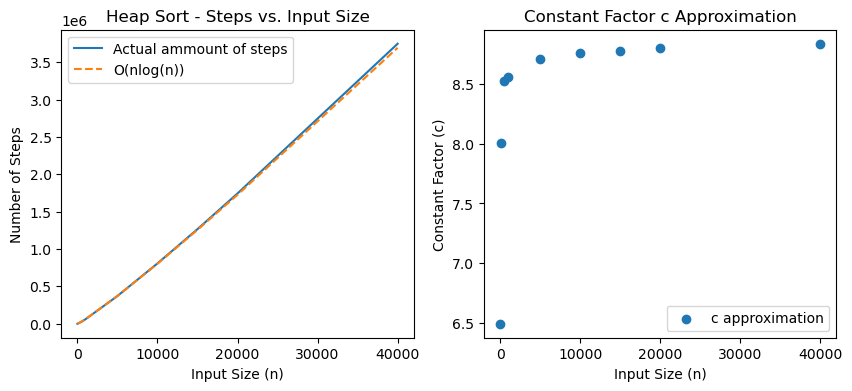

In [37]:
input_sizes = [2,100,500,1000,5000,10000,15000,20000,40000]
steps_taken = []
c=[]

#execute with increasing input_size
for n in input_sizes:
    random_list = [random.randint(0, 1000) for _ in range(n)]
    total_steps = heap_sort(random_list)
    steps_taken.append(total_steps)
    print(steps_taken)
    c.append(total_steps/(n*math.log(n)))
    clear_output(wait=True)
    print(n,"/", input_sizes[-1])
    print(steps_taken)

   
fig, ax = plt.subplots(1, 2,figsize=(10, 4))
    
ax[0].plot(input_sizes, steps_taken, label='Actual ammount of steps')
ax[0].plot(input_sizes, [c[4]*n*math.log(n) for n in input_sizes], label='O(nlog(n))', linestyle='--')
ax[0].set_xlabel('Input Size (n)')
ax[0].set_ylabel('Number of Steps')
ax[0].set_title('Heap Sort - Steps vs. Input Size')
ax[0].legend()

ax[1].scatter(input_sizes, c, label='c approximation')
ax[1].set_xlabel('Input Size (n)')
ax[1].set_ylabel('Constant Factor (c)')
ax[1].set_title('Constant Factor c Approximation')
ax[1].legend()

plt.show()

In [12]:
def quicksort(A, steps = 0):
    if len(A) <= 1:
        return A, steps
    else:
        pivot = A[0]
        less, greater = [], []
        
        # Partitioning done in function
        for x in A[1:]:
            steps += 1  
            if x <= pivot:
                less.append(x)
            else:
                greater.append(x)

        # Recursion
        less_sorted, less_steps = quicksort(less)
        greater_sorted, greater_steps = quicksort(greater)

        steps += less_steps + greater_steps
        
    sorted_arr = less_sorted + [pivot] + greater_sorted

    return A, steps



In [13]:
# Quicksort, as merge_sort, creates sub_lists in the form of "less_sorted"
# and "greater_sorted" as part of partitioning
A = [12, 11, 13, 5, 6, 7]
sorted_A, total_steps = quicksort(A)
print("Sorted array:", sorted_A)
print("Total steps:", total_steps)



Sorted array: [12, 11, 13, 5, 6, 7]
Total steps: 11


40000 / 40000
[1, 581, 4790, 10364, 75200, 183245, 311794, 443532, 1341685]


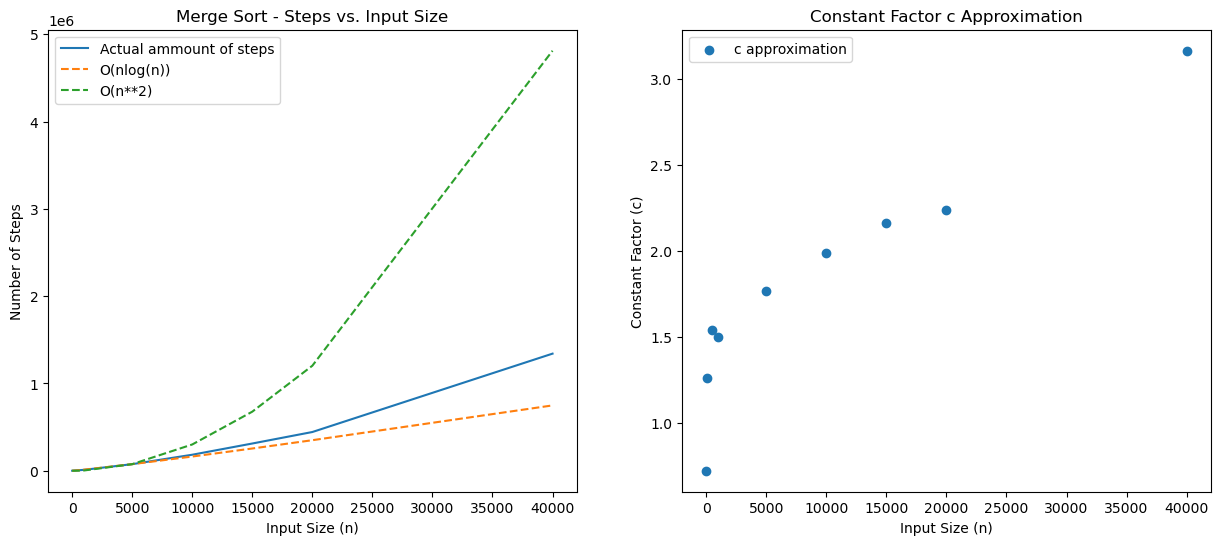

In [15]:
input_sizes = [2,100,500,1000,5000,10000,15000,20000,40000]
steps_taken = []
c=[]
c2=[]

#execute with increasing input_size
for n in input_sizes:
    random_list = [random.randint(0, 1000) for _ in range(n)]
    A, steps = quicksort(random_list)
    steps_taken.append(steps)
    count=0
    count+=1
    c.append(steps/(n*math.log(n)))
    c2.append(steps/(n**2))
    clear_output(wait=True)
    print(n,"/", input_sizes[-1])
    print(steps_taken)
   
fig, ax = plt.subplots(1, 2,figsize=(10, 4))
    
ax[0].plot(input_sizes, steps_taken, label='Actual ammount of steps')
ax[0].plot(input_sizes, [c[4]*n*math.log(n) for n in input_sizes], label='O(nlog(n))', linestyle='--')
ax[0].plot(input_sizes, [c2[4]*n**2 for n in input_sizes], label='O(n**2)', linestyle='--')
ax[0].set_xlabel('Input Size (n)')
ax[0].set_ylabel('Number of Steps')
ax[0].set_title('Merge Sort - Steps vs. Input Size')
ax[0].legend()

ax[1].scatter(input_sizes, c, label='c approximation')
ax[1].set_xlabel('Input Size (n)')
ax[1].set_ylabel('Constant Factor (c)')
ax[1].set_title('Constant Factor c Approximation')
ax[1].legend()

plt.show()

In [18]:
#Quicksort executon time
def quicksort(arr):
    if len(arr) <= 1:
        return arr
    else:
        pivot = arr[0]
        less = [x for x in arr[1:] if x <= pivot]
        greater = [x for x in arr[1:] if x > pivot]
        return quicksort(less) + [pivot] + quicksort(greater)

import time
input_size = [100, 1000, 5000, 10000]
for n in input_size:
    test_array = [random.randint(0, 1000) for _ in range(n)]
    start_time = time.time()
    quicksort(test_array)
    print(f"Python - Size: {n}, Time: {time.time() - start_time}")


Python - Size: 100, Time: 0.0001800060272216797
Python - Size: 1000, Time: 0.0023698806762695312
Python - Size: 5000, Time: 0.0119476318359375
Python - Size: 10000, Time: 0.01291799545288086


In [ ]:
#GO for comparison
package main

import (
	"fmt"
	"math/rand"
	"time"
)

func quicksort(arr []int) []int {
	if len(arr) < 2 {
		return arr
	}

	left, right := 0, len(arr)-1
	pivot := rand.Int() % len(arr)

	arr[pivot], arr[right] = arr[right], arr[pivot]

	for i := range arr {
		if arr[i] < arr[right] {
			arr[left], arr[i] = arr[i], arr[left]
			left++
		}
	}

	arr[left], arr[right] = arr[right], arr[left]

	quicksort(arr[:left])
	quicksort(arr[left+1:])

	return arr
}

func main() {
	inputSizes := []int{100, 1000, 5000, 10000}
	for _, size := range inputSizes {
		arr := make([]int, size)
		for i := range arr {
			arr[i] = rand.Intn(1000)
		}

		start := time.Now()
		quicksort(arr)
		elapsed := time.Since(start)
		fmt.Printf("Go - Size: %d, Time: %s\n", size, elapsed)
	}
}

#OUTPUT. Significantly faster, running python in jupyter migh affect this
Go - Size: 100, Time: 6.542µs
Go - Size: 1000, Time: 76.584µs
Go - Size: 5000, Time: 628.084µs
Go - Size: 10000, Time: 865.667µs

In [ ]:
#Proofs
#From chap_03_notes.pdf
Definition of Θ - Notation:
    Θ(g(n)) = {f(n) : there exist positive constants c1, c2, and n0 such that
    0 < c1g(n) < f(n) < c2g(n) for all n > n0}
Show that for any real constants a and b, where b>0, (n + a)**b = Θ(n**b)
#merge definition and "equation"
- f(n) = (n + a)**b & g(n) = n**b
#rewrite equation
- c1*n**b < (n + a)**b < c2*n**b 

#upper bound
-For large n, (n + a) = n (approx)
--follow up rule (n + a) < 2n
-gives: (n + a)**b < (2n)**b =2**b n**b
-c2 = 2**b
    
#lower bound
-for all values a, both positive and negative
-- (n + a)**b > n**b
-c1 = 1

#with given constants, the inequalities hold
-(n + a)**b = Θ(n**b)
--f(n) = Θ(g(n))

In [ ]:
#From chap_03_notes.pdf
Definition of o - Notation:
    o(g(n)) = {f(n) :  for all constants c > 0, there exists a constant
    n0 > 0 such that 0 < f(n) < cg(n) for all n > n0}
Show that n**2 /lg(n) = o(n**2)
#merge definition and "equation"
-f(n) = n**2 /lg(n) & g(n) = n**2
- n**2 /lg(n) < c*n**2
# n**2 on both sides
- 1/lg(n) < c
#as n grows, left side decreases meaning slower growth

In [ ]:
Show that, n**2 =/= o(n**2)
#confirm with opposite
- n**2 = o(n**2)
#merge
- f(n) = n**2 & g(n) = n**2
#from definition above
- 0 < n**2 < c*n**2 
#not true for c=1